# Introduction to data processing with PySpark
**Note: This notebook is for use on Google Colab. For running pyspark locally you need to first install PySpark and then follow [this notebook](data_processing_pyspark.ipynb).**

## Installation of Java and Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q www-us.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz  
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-2.4.0-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

## Upload data
### Method 1

In [ ]:
from google.colab import files
files.upload()

Saving lausanne_rental.csv to lausanne_rental (1).csv


{'lausanne_rental.csv': b'Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link\n5286965.0,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agr\xc3\xa9able 2 pi\xc3\xa8ces proche de toutes les commodit\xc3\xa9s,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=2023&ct=615&ci=1&pn=1\n5277530.0,80.0,3.0,flat,"Avenue de B\xc3\xa9thusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=2023&ct=615&ci=2&pn=1\n5249019.0,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pi\xc3\xa8ces avec jardin priv\xc3\xa9 -Immeuble r\xc3\xa9cent \xc3\xa0 Lausanne",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?s=2&t=1&l=2023&ct=615&ci=3&pn=1\n5274375.0,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex enti\xc3\xa8rement neuf,3160.0,,/en/d/duplex-maisonette-rent-lausanne/5274375?s=2&t=1&l=2023&ct=615&ci=4&pn=1\n5274374.0,80.0,3.5

In [ ]:
!mkdir ../data
!mv lausanne_rental.csv ../data

### Method 2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import libraries

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession

## Import data

In [ ]:
df = pd.read_csv('../data/lausanne_rental.csv')

**PySpark**

In [ ]:
spark = SparkSession.builder.getOrCreate()

In [ ]:
dfs = spark.read.csv('../data/lausanne_rental.csv', header=True)

## Preprocessing

**Pandas**

In [ ]:
df.head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
0,5286965.0,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...
1,5277530.0,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...
2,5249019.0,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...
3,5274375.0,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...
4,5274374.0,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...


**Spark**

In [ ]:
dfs.head(5)

[Row(Id='5286965.0', SurfaceArea='52.0', NumRooms='2.5', Type='flat', Address='Route Aloys-Fauquez 124, 1018 Lausanne, VD', Description='Agréable 2 pièces proche de toutes les commodités', Rent='1460.0', Bookmark='New', Link='/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=2023&ct=615&ci=1&pn=1'),
 Row(Id='5277530.0', SurfaceArea='80.0', NumRooms='3.0', Type='flat', Address='Avenue de Béthusy 53, 1012 Lausanne, VD', Description='Proche du centre ville', Rent='2100.0', Bookmark=None, Link='/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=2023&ct=615&ci=2&pn=1'),
 Row(Id='5249019.0', SurfaceArea='74.0', NumRooms='3.5', Type='stepped-apartment', Address='Route des Plaines-du-Loup 42, 1018 Lausanne, VD', Description='Magnifique 3,5 pièces avec jardin privé -Immeuble récent à Lausanne', Rent='2150.0', Bookmark='Highlight', Link='/en/d/stepped-apartment-rent-lausanne/5249019?s=2&t=1&l=2023&ct=615&ci=3&pn=1'),
 Row(Id='5274375.0', SurfaceArea='108.0', NumRooms='3.5', Type='duplex-maisonette', Address='R

In [ ]:
dfs.show(5)

+---------+-----------+--------+-----------------+--------------------+--------------------+------+---------+--------------------+
|       Id|SurfaceArea|NumRooms|             Type|             Address|         Description|  Rent| Bookmark|                Link|
+---------+-----------+--------+-----------------+--------------------+--------------------+------+---------+--------------------+
|5286965.0|       52.0|     2.5|             flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|
|5277530.0|       80.0|     3.0|             flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|
|5249019.0|       74.0|     3.5|stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|
|5274375.0|      108.0|     3.5|duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|     null|/en/d/duplex-mais...|
|5274374.0|       80.0|     3.5|             flat|Route de Prilly 1...|  Nouveaux l

**Possible convert to pandas:** 

In [ ]:
pd.DataFrame(dfs.head(5), columns=dfs.columns)

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
0,5286965.0,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...
1,5277530.0,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,None,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...
2,5249019.0,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...
3,5274375.0,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,None,/en/d/duplex-maisonette-rent-lausanne/5274375?...
4,5274374.0,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,None,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...


### Get column names

**Pandas**

In [ ]:
df.columns

Index(['Id', 'SurfaceArea', 'NumRooms', 'Type', 'Address', 'Description',
       'Rent', 'Bookmark', 'Link'],
      dtype='object')

**PySpark**

In [ ]:
dfs.columns

['Id',
 'SurfaceArea',
 'NumRooms',
 'Type',
 'Address',
 'Description',
 'Rent',
 'Bookmark',
 'Link']

### Get types

**Pandas**

In [ ]:
df.dtypes

Id             float64
SurfaceArea    float64
NumRooms       float64
Type            object
Address         object
Description     object
Rent           float64
Bookmark        object
Link            object
dtype: object

**PySpark**

In [ ]:
dfs.dtypes

[('Id', 'string'),
 ('SurfaceArea', 'string'),
 ('NumRooms', 'string'),
 ('Type', 'string'),
 ('Address', 'string'),
 ('Description', 'string'),
 ('Rent', 'string'),
 ('Bookmark', 'string'),
 ('Link', 'string')]

Note that the types in PySpark dont match with those of Pandas. This is becauase pandas automatically recognizes (guesses) the types, while in PySpark we need to explicitely specify the names. 

### Converting column types (or Add columns)

**Pandas**

In [ ]:
df['Id'] = df['Id'].astype('int')

In [ ]:
df.dtypes

Id                int64
SurfaceArea     float64
NumRooms        float64
Type           category
Address          object
Description      object
Rent            float64
Bookmark         object
Link             object
dtype: object

**PySpark**

In [ ]:
dfs = dfs.withColumn('Id', dfs['Id'].astype('int'))
dfs = dfs.withColumn('SurfaceArea', dfs['SurfaceArea'].astype('float'))
dfs = dfs.withColumn('Rent', dfs['Rent'].astype('float'))
dfs = dfs.withColumn('NumRooms', dfs['NumRooms'].astype('float'))

In [ ]:
dfs.dtypes

[('Id', 'int'),
 ('SurfaceArea', 'float'),
 ('NumRooms', 'string'),
 ('Type', 'string'),
 ('Address', 'string'),
 ('Description', 'string'),
 ('Rent', 'float'),
 ('Bookmark', 'string'),
 ('Link', 'string')]

### Rename Columns

**Pandas**

In [ ]:
dftmp = df.copy()  # if you don't put the .copy() dftmp "points" to the same dataframe as df, so any change of dftmp affects df

In [ ]:
df.columns

Index(['Id', 'SurfaceArea', 'NumRooms', 'Type', 'Address', 'Description',
       'Rent', 'Bookmark', 'Link'],
      dtype='object')

In [ ]:
dftmp.columns = list('ABCDEFGHI')

In [ ]:
dftmp.columns

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'], dtype='object')

Or for a specific column:

In [ ]:
dftmp = dftmp.rename(columns={'A':'Id'})

In [ ]:
dftmp.head()

,Id,B,C,D,E,F,G,H,I
0,5286965.0,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...
1,5277530.0,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...
2,5249019.0,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...
3,5274375.0,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...
4,5274374.0,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...


**PySpark**

In [ ]:
dfs.toDF('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I') # note that the changes in PySpark are immutable

DataFrame[A: string, B: string, C: string, D: string, E: string, F: string, G: string, H: string, I: string]

In [ ]:
dfs.columns

['Id',
 'SurfaceArea',
 'NumRooms',
 'Type',
 'Address',
 'Description',
 'Rent',
 'Bookmark',
 'Link']

In [ ]:
dfs.withColumnRenamed('Id', 'A') # again immutable

DataFrame[A: string, SurfaceArea: string, NumRooms: string, Type: string, Address: string, Description: string, Rent: string, Bookmark: string, Link: string]

In [ ]:
dfs.columns

['Id',
 'SurfaceArea',
 'NumRooms',
 'Type',
 'Address',
 'Description',
 'Rent',
 'Bookmark',
 'Link']

### Drop columns

**Pandas**

In [ ]:
df.drop('Id', axis = 1).head() # immutable

,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
0,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...
1,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...
2,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...
3,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...
4,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...


In [ ]:
dfs.drop('Id').show(5) # immutable

+-----------+--------+-----------------+--------------------+--------------------+------+---------+--------------------+
|SurfaceArea|NumRooms|             Type|             Address|         Description|  Rent| Bookmark|                Link|
+-----------+--------+-----------------+--------------------+--------------------+------+---------+--------------------+
|       52.0|     2.5|             flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|
|       80.0|     3.0|             flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|
|       74.0|     3.5|stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|
|      108.0|     3.5|duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|     null|/en/d/duplex-mais...|
|       80.0|     3.5|             flat|Route de Prilly 1...|  Nouveaux logements|2085.0|     null|/en/d/flat-rent-l...|
+-----------+--------+----------

### Summary Statistics: Describe

**Pandas**

In [ ]:
df.describe()

,Id,SurfaceArea,NumRooms,Rent
count,5.930000e+02,533.000000,491.000000,588.000000
mean,5.192966e+06,74.628518,3.230143,1993.539116
std,1.777511e+05,44.516628,1.217218,1013.944446
min,3.641118e+06,1.000000,1.500000,300.000000
25%,5.200706e+06,49.000000,2.500000,1358.750000
50%,5.257101e+06,69.000000,3.000000,1795.000000
75%,5.277133e+06,96.000000,3.500000,2463.750000
max,5.288318e+06,540.000000,11.000000,8900.000000


**PySpark**

In [ ]:
dfs.describe().show()

+-------+------------------+-----------------+-----------------+----------+--------------------+--------------------+------------------+--------------------+--------------------+
|summary|                Id|      SurfaceArea|         NumRooms|      Type|             Address|         Description|              Rent|            Bookmark|                Link|
+-------+------------------+-----------------+-----------------+----------+--------------------+--------------------+------------------+--------------------+--------------------+
|  count|               593|              533|              491|       593|                 593|                 585|               587|                  68|                 593|
|   mean| 5192965.986509275|74.62851782363977|3.230142566191446|      null|                null|                null|1984.3287904599658|                null|              7400.0|
| stddev|177751.12215332632|44.51662793438704| 1.21721821532338|      null|                null|         

In [ ]:
dfs.describe().toPandas()

,summary,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
0,count,593,533,491,593,593,585,587,68,593
1,mean,5192965.986509275,74.62851782363977,3.230142566191446,None,None,None,1984.3287904599658,None,7400.0
2,stddev,177751.12215332632,44.51662793438704,1.21721821532338,None,None,None,989.8851120494071,None,NaN
3,min,3641118,1.0,1.5,attic-flat,"""""""-""""",1005 Lausanne,300.0,## «A louer chambre à côté du CHUV pour le moi...,/en/d/attic-flat-rent-lausanne/5204786?s=2&t=1...
4,max,5288318,540.0,8.5,studio,"rue saint francois, 1003 Lausanne, VDClose### ...","à louer, Appartement, 1010 Lausanne, Réf 1998728",8900.0,Virtual tour,7400.0


### Slicing (Filtering)

**Pandas**

In [ ]:
df[df['SurfaceArea'] < 50].head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link
9,5275170,13.0,NaN,single-room,"Av. de Chailly 52, 1012 Lausanne, VD",Pour petit budget - Quartier tranquille proche...,360.0,NaN,/en/d/single-room-rent-lausanne/5275170?s=2&t=...
10,5212203,13.0,NaN,single-room,"Av. de Chailly 52, 1012 Lausanne, VD",Proche de toutes les commodités,380.0,NaN,/en/d/single-room-rent-lausanne/5212203?s=2&t=...
11,5251291,19.0,NaN,flat,"Av. de Riant-Mont 15, 1004 Lausanne, VD","Appartement, 1.0 pièce(s)",637.0,NaN,/en/d/flat-rent-s)»lausanne/5251291?s=2&t=1&l=...
12,5279333,20.0,NaN,flat,"Av. de Tivoli 19Bis, 1007 Lausanne, VD","Appartement, 1.0 pièce(s)",725.0,NaN,/en/d/flat-rent-s)»lausanne/5279333?s=2&t=1&l=...
13,5280881,27.0,NaN,flat,"Isabelle de Montolieu 161, 1010 Lausanne, VD",Haut de la Ville - quartier Vennes - proche de...,780.0,NaN,/en/d/flat-rent-lausanne/5280881?s=2&t=1&l=202...


In [ ]:
dfs[dfs['SurfaceArea'] < 50].show(5)

+-------+-----------+--------+-----------+--------------------+--------------------+-----+--------+--------------------+
|     Id|SurfaceArea|NumRooms|       Type|             Address|         Description| Rent|Bookmark|                Link|
+-------+-----------+--------+-----------+--------------------+--------------------+-----+--------+--------------------+
|5275170|       13.0|    null|single-room|Av. de Chailly 52...|Pour petit budget...|360.0|    null|/en/d/single-room...|
|5212203|       13.0|    null|single-room|Av. de Chailly 52...|Proche de toutes ...|380.0|    null|/en/d/single-room...|
|5251291|       19.0|    null|       flat|Av. de Riant-Mont...|Appartement, 1.0 ...|637.0|    null|/en/d/flat-rent-s...|
|5279333|       20.0|    null|       flat|Av. de Tivoli 19B...|Appartement, 1.0 ...|725.0|    null|/en/d/flat-rent-s...|
|5280881|       27.0|    null|       flat|Isabelle de Monto...|Haut de la Ville ...|780.0|    null|/en/d/flat-rent-l...|
+-------+-----------+--------+--

### Aggregate functions

**Pandas**

In [ ]:
df['Rent'].mean()

1993.539115646258

In [ ]:
df['Rent'].max()

8900.0

**PySpark**

In [ ]:
dfs['Rent'].mean()

TypeError: 'Column' object is not callable

Does not work out the same way! You need to first download the PySpark SQL functions:

In [ ]:
from pyspark.sql import functions as F

In [ ]:
dfs.select(F.mean('Rent')).show()

+------------------+
|         avg(Rent)|
+------------------+
|1984.3287904599658|
+------------------+



In [ ]:
dfs.select(F.max('Rent')).show()

+---------+
|max(Rent)|
+---------+
|   8900.0|
+---------+



If you want to get the value:

In [ ]:
value = dfs.select(F.mean('Rent')).collect()[0].asDict()['avg(Rent)']
value

1984.3287904599658

### Fill Nulls

**Pandas**

In [ ]:
df['Rent'] = df['Rent'].fillna(df['Rent'].mean()) # generally not a good way of filling nan, how about median? How about filling based on correlation with other features? 
df['NumRooms'] = df['NumRooms'].fillna(df['NumRooms'].mean())

**PySpark**

In [ ]:
dfs = dfs.fillna(value, subset=['Rent'])

In [ ]:
value_numrooms = dfs.select(F.mean('NumRooms')).collect()[0].asDict()['avg(NumRooms)']

In [ ]:
dfs = dfs.fillna(value_numrooms, subset=['NumRooms'])

### Group by (Aggregation)

**Pandas**

In [ ]:
df.groupby('NumRooms').agg({'Rent':'mean'})

,Rent
NumRooms,
1.5,1346.954545
2.0,1533.193548
2.5,1699.888889
3.0,1932.842105
3.5,2285.079646
4.0,2839.941176
4.5,2882.246377
5.0,2624.142857
5.5,3177.714286


**PySpark**

In [ ]:
dfs.groupby('NumRooms').agg({'Rent':'mean'})

DataFrame[NumRooms: float, avg(Rent): double]

In [ ]:
dfs.groupby(['NumRooms']).agg({'Rent': 'mean', 'SurfaceArea': 'mean'}).sort('NumRooms').show()

+--------+------------------+------------------+
|NumRooms|  avg(SurfaceArea)|         avg(Rent)|
+--------+------------------+------------------+
|    null| 36.81521739130435|  1207.88557583678|
|     1.5| 37.22222222222222|1346.9545454545455|
|     2.0| 52.04705882352941|1537.9928588867188|
|     2.5| 58.81818181818182| 1699.888888888889|
|     3.0| 76.13461538461539|1933.7298057819235|
|     3.5| 87.02884615384616|2279.8491953974185|
|     4.0| 104.3529411764706|2839.9411764705883|
|     4.5|111.37878787878788| 2882.246376811594|
|     5.0|128.41666666666666|2624.1428571428573|
|     5.5|125.35714285714286| 3177.714285714286|
|     6.0|             150.0|            2244.0|
|     7.0|             156.0|            4050.0|
|     8.5|             238.0|4931.4429117838545|
|    11.0|             481.5|            8900.0|
+--------+------------------+------------------+



### Transformations

**Pandas**

In [ ]:
import numpy as np

In [ ]:
df['logRent'] = np.log(df['Rent'])

In [ ]:
df.head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,logRent
0,5286965,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...,7.286192
1,5277530,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...,7.649693
2,5249019,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...,7.673223
3,5274375,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...,8.058327
4,5274374,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...,7.642524


**PySpark**

In [ ]:
import pyspark.sql.functions as F

In [ ]:
dfs = dfs.withColumn('logRent', F.log(dfs['Rent']))

In [ ]:
dfs.show()

+-------+-----------+--------+--------------------+--------------------+--------------------+------+---------+--------------------+-----------------+
|     Id|SurfaceArea|NumRooms|                Type|             Address|         Description|  Rent| Bookmark|                Link|          logRent|
+-------+-----------+--------+--------------------+--------------------+--------------------+------+---------+--------------------+-----------------+
|5286965|       52.0|     2.5|                flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|7.286191714702382|
|5277530|       80.0|     3.0|                flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|7.649692623711514|
|5249019|       74.0|     3.5|   stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|7.673223121121708|
|5274375|      108.0|     3.5|   duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|

**Note**: pyspark.sql.functions perform fast computations as the whole calcluations are doen in JVM! 

### User-defined functions

In [ ]:
df['NumRoomsOnly'] = df['NumRooms'].apply(lambda x: x - 1)

In [ ]:
df.head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,logRent,NumRoomsOnly
0,5286965,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...,7.286192,1.5
1,5277530,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...,7.649693,2.0
2,5249019,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...,7.673223,2.5
3,5274375,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...,8.058327,2.5
4,5274374,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...,7.642524,2.5


Pyspark user-defined function, note that the udf has to be deterministic. 

In [ ]:
from pyspark.sql.types import FloatType

In [ ]:
myFun = F.udf(lambda x: x - 1, returnType=FloatType()) # need to specify the return type otherwise you may get NaN

In [ ]:
dfs2 = dfs.withColumn('NumRoomsOnly', myFun(dfs['NumRooms'])) # Note that if you don't fillna you get an error when you collect the data i.e. in the next line! 

In [ ]:
dfs2.show()

+-------+-----------+---------+--------------------+--------------------+--------------------+------+---------+--------------------+------------+
|     Id|SurfaceArea| NumRooms|                Type|             Address|         Description|  Rent| Bookmark|                Link|NumRoomsOnly|
+-------+-----------+---------+--------------------+--------------------+--------------------+------+---------+--------------------+------------+
|5286965|       52.0|      2.5|                flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|         1.5|
|5277530|       80.0|      3.0|                flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|         2.0|
|5249019|       74.0|      3.5|   stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|         2.5|
|5274375|      108.0|      3.5|   duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|     null|/en/d/duplex-

### Join/Merge 

**Pandas**

In [ ]:
map1 = {'name':['Switzerland', 'France', 'Germany', 'Italy'], 'AlphaCode':['CH', 'FR', 'DE', 'IT']}
df1 = pd.DataFrame(map1)

In [ ]:
map2 = {'AlphaCode':['FR', 'CH', 'IT', 'DE'], 'Population':[67, 8.5, 60, 82]}
df2 = pd.DataFrame(map2)

In [ ]:
df1

,name,AlphaCode
0,Switzerland,CH
1,France,FR
2,Germany,DE
3,Italy,IT


In [ ]:
df2

,AlphaCode,Population
0,FR,67.0
1,CH,8.5
2,IT,60.0
3,DE,82.0


In [ ]:
df1.merge(df2, on='AlphaCode') # Why don't we just add the last column as a new column instead of merge? 

,name,AlphaCode,Population
0,Switzerland,CH,8.5
1,France,FR,67.0
2,Germany,DE,82.0
3,Italy,IT,60.0


**PySpark**

In [ ]:
df1s = spark.createDataFrame(df1) # you can create a Spark dataframe from a Pandas dataframe
df2s = spark.createDataFrame(df2) #

In [ ]:
df1s.join(df2s, on='AlphaCode').show()

+---------+-----------+----------+
|AlphaCode|       name|Population|
+---------+-----------+----------+
|       DE|    Germany|      82.0|
|       FR|     France|      67.0|
|       CH|Switzerland|       8.5|
|       IT|      Italy|      60.0|
+---------+-----------+----------+



### Creata dataframe

**Pandas**

**PySpark**

In [ ]:
schema?

### Pivot table

**Pandas**

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'], aggfunc=np.sum)

**PySpark**

In [ ]:
dfs.groupby('A', 'B').pivot('C').sum('D')

### Plotting

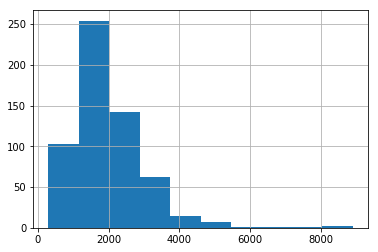

In [ ]:
df['Rent'].hist()

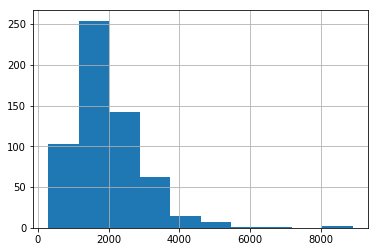

In [ ]:
dfs.toPandas()['Rent'].hist()

However, usually `dfs` is too big to be able to plot it (otherwise you may use pandas from the beginning), solution? Sampling:

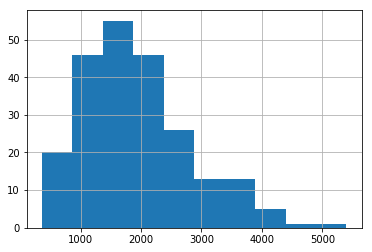

In [ ]:
dfs.sample(withReplacement=False, fraction=0.4).toPandas()['Rent'].hist()

### SQL

**Pandas**

no built-in SQL to Pandas! 

**PySpark**

In [ ]:
dfs.createOrReplaceTempView('dfview')

In [ ]:
spark.sql('SELECT Address, Rent FROM dfview WHERE Rent < 1000').show()

+--------------------+-----+
|             Address| Rent|
+--------------------+-----+
|Av. de Chailly 52...|360.0|
|Av. de Chailly 52...|380.0|
|Av. de Riant-Mont...|637.0|
|Av. de Tivoli 19B...|725.0|
|Isabelle de Monto...|780.0|
|Rue St-Martin 28,...|840.0|
|Avenue Sainte-Luc...|850.0|
|Chemin de Montoli...|860.0|
|Ch. du Devin 64, ...|940.0|
|Chemin des Alling...|300.0|
|   1007 Lausanne, VD|400.0|
|1004 Lausanne, VD...|500.0|
|Chemin de Longera...|500.0|
|Chailly, 1012 Lau...|600.0|
|   1004 Lausanne, VD|600.0|
|Avenue de Rhodani...|600.0|
|1007 Lausanne, 10...|600.0|
|avenue Druey coll...|600.0|
|Avenue Marc-Dufou...|640.0|
|   1010 Lausanne, VD|650.0|
+--------------------+-----+
only showing top 20 rows

